In [29]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [30]:
# Load the dataset
df = pd.read_csv('diabetes (2).csv')
df

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.310000,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.440000,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.630000,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.720000,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,41506,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,130.0,94.0,35.0,39.0,210.0
399,41507,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,146.0,102.0,32.0,43.0,180.0
400,41510,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,NaN,NaN,33.0,40.0,20.0
401,41752,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,NaN,NaN,41.0,48.0,255.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        403 non-null    int64  
 1   chol      402 non-null    float64
 2   stab.glu  403 non-null    int64  
 3   hdl       402 non-null    float64
 4   ratio     402 non-null    float64
 5   glyhb     390 non-null    float64
 6   location  403 non-null    object 
 7   age       403 non-null    int64  
 8   gender    403 non-null    object 
 9   height    398 non-null    float64
 10  weight    402 non-null    float64
 11  frame     391 non-null    object 
 12  bp.1s     398 non-null    float64
 13  bp.1d     398 non-null    float64
 14  bp.2s     141 non-null    float64
 15  bp.2d     141 non-null    float64
 16  waist     401 non-null    float64
 17  hip       401 non-null    float64
 18  time.ppn  400 non-null    float64
dtypes: float64(13), int64(3), object(3)
memory usage: 59.9+ KB


In [32]:
df.shape

(403, 19)

In [33]:
df.describe()

,id,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
count,403.000000,402.000000,403.000000,402.000000,402.000000,390.000000,403.000000,398.000000,402.000000,398.000000,398.000000,141.000000,141.000000,401.000000,401.000000,400.000000
mean,15978.310174,207.845771,106.672457,50.445274,4.521642,5.589769,46.851117,66.020101,177.592040,136.904523,83.321608,152.382979,92.524823,37.900249,43.039900,341.250000
std,11881.122124,44.445557,53.076655,17.262626,1.727886,2.242595,16.312333,3.918515,40.340666,22.741033,13.589227,21.712952,11.555198,5.729313,5.656713,309.540953
min,1000.000000,78.000000,48.000000,12.000000,1.500000,2.680000,19.000000,52.000000,99.000000,90.000000,48.000000,110.000000,60.000000,26.000000,30.000000,5.000000
25%,4792.500000,179.000000,81.000000,38.000000,3.200000,4.380000,34.000000,63.000000,151.000000,121.250000,75.000000,138.000000,84.000000,33.000000,39.000000,90.000000
50%,15766.000000,204.000000,89.000000,46.000000,4.200000,4.840000,45.000000,66.000000,172.500000,136.000000,82.000000,149.000000,92.000000,37.000000,42.000000,240.000000
75%,20336.000000,230.000000,106.000000,59.000000,5.400000,5.600000,60.000000,69.000000,200.000000,146.750000,90.000000,161.000000,100.000000,41.000000,46.000000,517.500000
max,41756.000000,443.000000,385.000000,120.000000,19.299999,16.110001,92.000000,76.000000,325.000000,250.000000,124.000000,238.000000,124.000000,56.000000,64.000000,1560.000000


In [34]:
# Categorical variable summary
print(df['gender'].value_counts())
print(df['frame'].value_counts())


gender
female    234
male      169
Name: count, dtype: int64
frame
medium    184
small     104
large     103
Name: count, dtype: int64


In [35]:
# Check missing values
print(df.isnull().sum())


id            0
chol          1
stab.glu      0
hdl           1
ratio         1
glyhb        13
location      0
age           0
gender        0
height        5
weight        1
frame        12
bp.1s         5
bp.1d         5
bp.2s       262
bp.2d       262
waist         2
hip           2
time.ppn      3
dtype: int64


In [36]:
# Impute missing values for numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])


In [37]:
#  Check numeric columns ---
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numeric columns:", numeric_cols)
print("\n Checking for outliers using IQR method...\n")
outlier_summary = {}

for col in numeric_cols:
    if col.lower() not in ['glyhb	', 'target']: 
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_summary[col] = outliers

Numeric columns: ['id', 'chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'age', 'height', 'weight', 'bp.1s', 'bp.1d', 'bp.2s', 'bp.2d', 'waist', 'hip', 'time.ppn']

 Checking for outliers using IQR method...



In [38]:
# Visualize outliers (boxplots for top 4 columns)
# Convert to DataFrame for sorting
outliers_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count']).sort_values(by='Outlier Count', ascending=False)

#  Select top 4 columns with most outliers
top_cols = outliers_df.head(4).index.tolist()

In [39]:
#  Handle outliers using IQR capping 
for col in numeric_cols:
    if col.lower() not in ['Dataset', 'target']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound,
                                np.where(df[col] > upper_bound, upper_bound, df[col]))


In [40]:
for col in numeric_cols:
    if col.lower() not in ['classification', 'target']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound,
                                np.where(df[col] > upper_bound, upper_bound, df[col]))


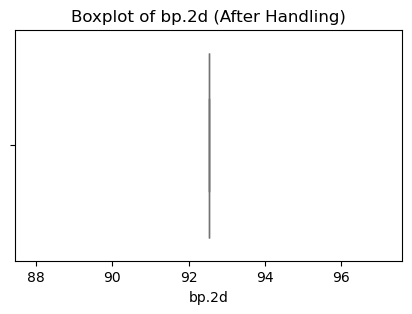

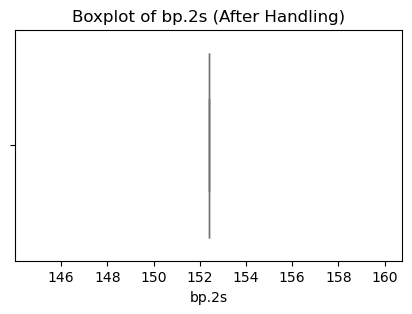

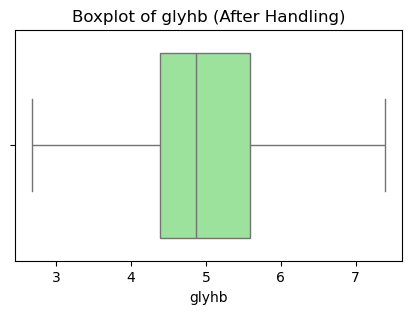

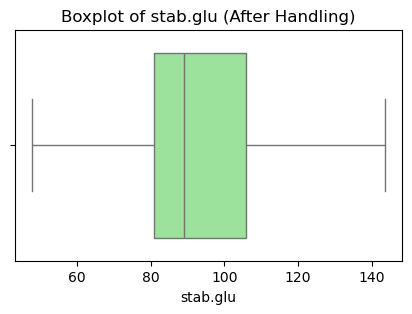

In [41]:
# Verify after handling
for col in top_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col} (After Handling)")
    plt.show()

In [42]:
# Encode categorical variables
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

le_frame = LabelEncoder()
df['frame'] = le_frame.fit_transform(df['frame'])

le_location = LabelEncoder()
df['location'] = le_location.fit_transform(df['location'])


In [43]:
# Feature engineering: Calculate BMI and waist/hip ratio
df['BMI'] = df['weight'] / ((df['height']*0.0254) ** 2)
df['waist_hip_ratio'] = df['waist'] / df['hip']

# Target Creation: set diabetes = 1 if glyhb > 7, else 0
df['diabetes'] = (df['glyhb'] > 7.0).astype(int)
print(df['diabetes'].value_counts())


diabetes
0    343
1     60
Name: count, dtype: int64


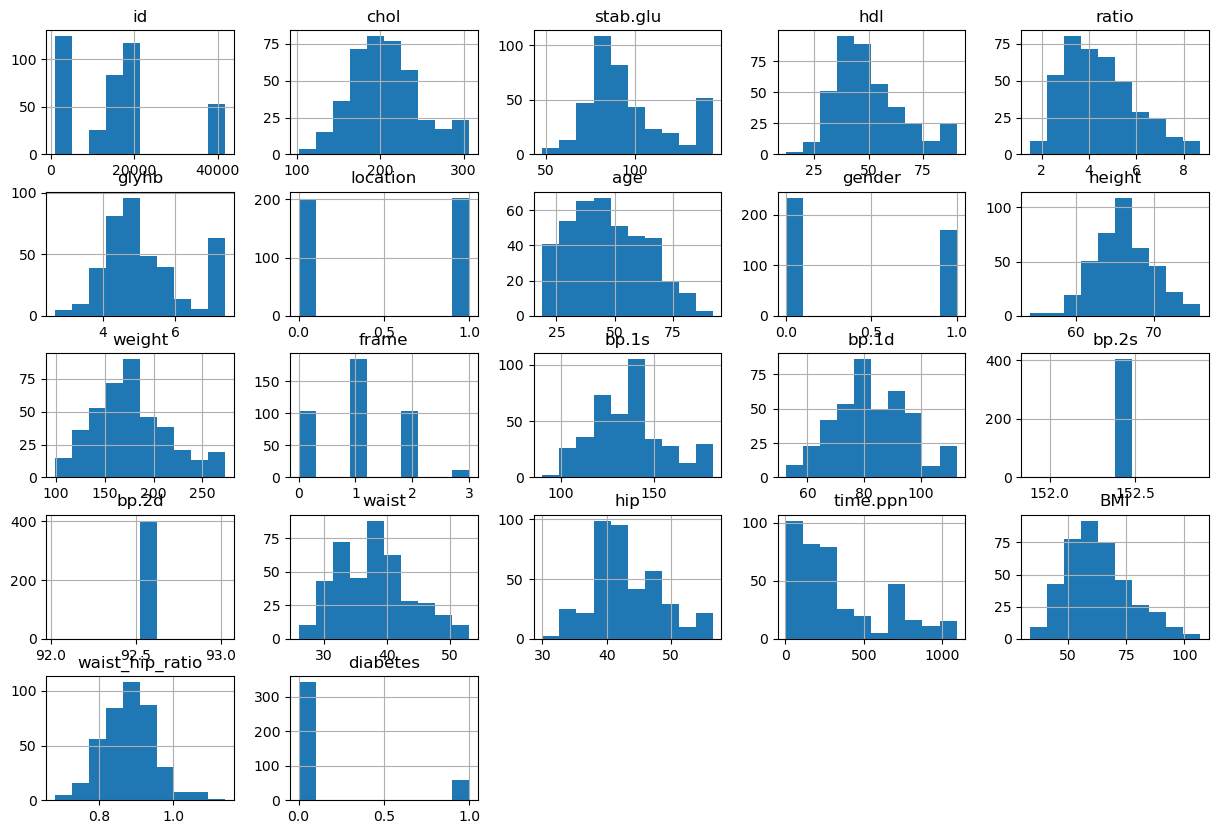

In [44]:
# Distribution of main variables
df.hist(figsize=(15, 10))
plt.show()


In [45]:
feature_cols = [
    'chol', 'stab.glu', 'hdl', 'ratio', 'age', 'gender', 'height',
    'weight', 'frame', 'bp.1s', 'bp.1d', 'bp.2s', 'bp.2d', 'waist',
    'hip', 'time.ppn', 'location', 'BMI', 'waist_hip_ratio'
]


In [46]:
X = df[feature_cols]
y = df['diabetes']


In [47]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_resampled.value_counts())


Before SMOTE: diabetes
0    343
1     60
Name: count, dtype: int64
After SMOTE: diabetes
0    343
1    343
Name: count, dtype: int64


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
print(np.isnan(X_train).sum()) 

chol               0
stab.glu           0
hdl                0
ratio              0
age                0
gender             0
height             0
weight             0
frame              0
bp.1s              0
bp.1d              0
bp.2s              0
bp.2d              0
waist              0
hip                0
time.ppn           0
location           0
BMI                0
waist_hip_ratio    0
dtype: int64


In [50]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy='mean') 
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

print(np.isnan(X_train).sum())

0


In [51]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True)
}

results = {}
trained_models = {}

# ✅ Train and store each trained model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    trained_models[name] = model 


In [53]:
accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*40 + "\n")

Model: Logistic Regression
Accuracy: 0.8889
              precision    recall  f1-score   support

           0       0.93      0.94      0.94        69
           1       0.64      0.58      0.61        12

    accuracy                           0.89        81
   macro avg       0.78      0.76      0.77        81
weighted avg       0.89      0.89      0.89        81

Confusion Matrix:
[[65  4]
 [ 5  7]]


Model: Decision Tree
Accuracy: 0.8519
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        69
           1       0.50      0.67      0.57        12

    accuracy                           0.85        81
   macro avg       0.72      0.78      0.74        81
weighted avg       0.87      0.85      0.86        81

Confusion Matrix:
[[61  8]
 [ 4  8]]


Model: Random Forest
Accuracy: 0.8889
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        69
           1       0.67      0.50      

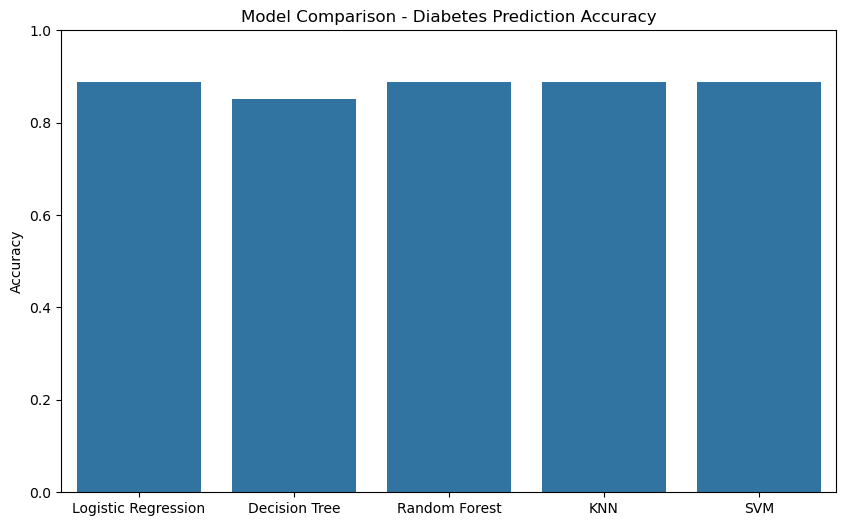

In [54]:
plt.figure(figsize=(10,6))
model_names = list(accuracy_scores.keys())
scores = [accuracy_scores[name] for name in model_names]
sns.barplot(x=model_names, y=scores)
plt.ylabel('Accuracy')
plt.title('Model Comparison - Diabetes Prediction Accuracy')
plt.ylim(0, 1)
plt.show()

In [55]:
import joblib
import os
best_model_name = max(results, key=results.get)
best_model = trained_models[best_model_name]

print(f"\nBest model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best trained model
os.makedirs("models", exist_ok=True)
MODEL_SAVE_PATH = f"models/best_model_{best_model_name}.pkl"
joblib.dump(best_model, MODEL_SAVE_PATH)

print(f" Model saved successfully at: {MODEL_SAVE_PATH}")

# Verify loading
loaded_model = joblib.load(MODEL_SAVE_PATH)
print(" Model loaded successfully!")
print(type(loaded_model))


Best model: Logistic Regression with accuracy 0.8889
 Model saved successfully at: models/best_model_Logistic Regression.pkl
 Model loaded successfully!
<class 'sklearn.linear_model._logistic.LogisticRegression'>
